#数据采集
##发送HTTP请求

In [ ]:
cid='202981186'
url=f'https://comment.bilibili.com/{cid}.xml'
print(url)

https://comment.bilibili.com/202981186.xml


In [ ]:
import requests
rq=requests.get(url)
print(rq.status_code)

200


In [ ]:
rq.encoding='UTF-8'
text=rq.text

##网页解析

In [ ]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(text,'lxml')
soup

/usr/local/lib/python3.9/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<?xml version="1.0" encoding="UTF-8"?><html><body><i><chatserver>chat.bilibili.com</chatserver><chatid>202981186</chatid><mission>0</mission><maxlimit>6000</maxlimit><state>0</state><real_name>0</real_name><source>k-v</source><d p="2537.05300,5,25,15138834,1600298405,0,f10f5a07,38354933574008839,10">趵突泉：管好你自己</d><d p="2660.74800,5,25,14811775,1640421536,0,310ba593,59417735245642752,10">防李清照的围挡哈哈哈哈</d><d p="1079.68500,5,25,16646914,1639056977,0,6eccde8d,58702313395592192,10">《大    青    岛》</d><d p="1988.86600,5,25,16777215,1630772093,0,7515cb93,54358648382177792,10">扑   棱   鹅  子</d><d p="168.38200,1,25,16777215,1659333246,0,b3688029,1109326692008357120,10">轩轩的家乡</d><d p="1014.71900,1,25,16777215,1649580678,0,f5476450,1027516223480648192,10">轩轩的家乡</d><d p="1077.02800,1,25,16777215,1642862596,0,ddfc1713,971160865257930752,10">小宋老师的姐妹等等！</d><d p="1441.72400,1,25,16777215,1642839648,0,3cc42f83,970968362212352000,10">年级第一，我要当年级第一</d><d p="2177.13600,1,25,4351678,1642677883,0,2035897,969611374

In [ ]:
tmp=soup.select('d')
danmu=[i.text for i in tmp]
##[tmp[0].get('p').split(',')]
data=[i.get('p').split(',') for i in tmp]

In [ ]:
len(data)

7200

##保存数据

In [ ]:
import pandas as pd
pd.__version__

'1.4.4'

In [ ]:
data=pd.DataFrame(data)
data.columns=[['出现时间点','模式','字体','颜色','发送时间','弹幕池','用户id','rowid','content']]
data['content']=danmu
data.head()

,出现时间点,模式,字体,颜色,发送时间,弹幕池,用户id,rowid,content
0,2537.05300,5,25,15138834,1600298405,0,f10f5a07,38354933574008839,趵突泉：管好你自己
1,2660.74800,5,25,14811775,1640421536,0,310ba593,59417735245642752,防李清照的围挡哈哈哈哈
2,1079.68500,5,25,16646914,1639056977,0,6eccde8d,58702313395592192,《大 青 岛》
3,1988.86600,5,25,16777215,1630772093,0,7515cb93,54358648382177792,扑 棱 鹅 子
4,168.38200,1,25,16777215,1659333246,0,b3688029,1109326692008357120,轩轩的家乡


In [ ]:
data.to_csv('./content_shandong.csv',index=None)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data.head()

,出现时间点,模式,字体,颜色,发送时间,弹幕池,用户id,rowid,content
0,2537.05300,5,25,15138834,1600298405,0,f10f5a07,38354933574008839,趵突泉：管好你自己
1,2660.74800,5,25,14811775,1640421536,0,310ba593,59417735245642752,防李清照的围挡哈哈哈哈
2,1079.68500,5,25,16646914,1639056977,0,6eccde8d,58702313395592192,《大 青 岛》
3,1988.86600,5,25,16777215,1630772093,0,7515cb93,54358648382177792,扑 棱 鹅 子
4,168.38200,1,25,16777215,1659333246,0,b3688029,1109326692008357120,轩轩的家乡


分词 词云图


In [ ]:
import wordcloud
import jieba
import pandas as pd
from tkinter import  _flatten
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/content_shandong.csv")
data

,出现时间点,模式,字体,颜色,发送时间,弹幕池,用户id,rowid,content
0,2537.053,5,25,15138834,1600298405,0,f10f5a07,38354933574008839,趵突泉：管好你自己
1,2660.748,5,25,14811775,1640421536,0,310ba593,59417735245642752,防李清照的围挡哈哈哈哈
2,1079.685,5,25,16646914,1639056977,0,6eccde8d,58702313395592192,《大 青 岛》
3,1988.866,5,25,16777215,1630772093,0,7515cb93,54358648382177792,扑 棱 鹅 子
4,168.382,1,25,16777215,1659333246,0,b3688029,1109326692008357120,轩轩的家乡
...,...,...,...,...,...,...,...,...,...
7195,2679.279,1,25,16777215,1645532709,0,c8ee4e81,993559395082182656,红红火火恍恍惚惚
7196,1945.311,1,25,16777215,1645531828,0,c8ee4e81,993552007543816192,还有一只在扭屁股∠( ᐛ 」∠)_
7197,1612.863,1,25,16777215,1645531406,0,c8ee4e81,993548461304709120,小 胖 子 ∠( ᐛ 」∠)_
7198,648.585,1,25,16777215,1645530305,0,c8ee4e81,993539228360990720,老 司 机


In [ ]:
jieba.add_word('大青岛')

In [ ]:
data_cut=data['content'].apply(jieba.lcut)

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/stoplist.txt",'r',encoding='utf-8') as f:
  stop=f.read().split()
stop=stop + [' ','\n','\t']
stop

['———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '.',
 '『',
 '.一',
 './',
 '--',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１．',
 '－－',
 '［②ｂ］',
 '’‘',
 '×××',
 '［①⑧］',
 '０：２',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '.日',
 '［②ｄ］',

In [ ]:
data_after=data_cut.apply(lambda s: [w for w in s if w not in stop])
data_after

0                     [趵突泉, 管好]
1            [防, 李清照, 围挡, 哈哈哈哈]
2                     [大, 青, 岛]
3                  [扑, 棱, 鹅, 子]
4                      [轩轩, 家乡]
                 ...           
7195               [红红火火, 恍恍惚惚]
7196    [一只, 扭, 屁股, ∠, ᐛ, ∠, _]
7197      [小, 胖, 子, ∠, ᐛ, ∠, _]
7198                  [老, 司, 机]
7199                    [果, 兰花]
Name: content, Length: 7200, dtype: object

In [ ]:
data_cut

0                                     [趵突泉, ：, 管好, 你, 自己]
1                                   [防, 李清照, 的, 围挡, 哈哈哈哈]
2                 [《, 大,  ,  ,  ,  , 青,  ,  ,  ,  , 岛, 》]
3                    [扑,  ,  ,  , 棱,  ,  ,  , 鹅,  ,  , 子]
4                                             [轩轩, 的, 家乡]
                              ...                        
7195                                         [红红火火, 恍恍惚惚]
7196        [还有, 一只, 在, 扭, 屁股, ∠, (,  , ᐛ,  , 」, ∠, ), _]
7197    [小,  ,  , 胖,  ,  , 子,  ,  , ∠, (,  , ᐛ,  , 」, ...
7198                                [老,  ,  , 司,  ,  , 机]
7199                                              [果, 兰花]
Name: content, Length: 7200, dtype: object

In [ ]:
#t统计词频
_flatten(list(data_after))

#data_after.value_counts()

('趵突泉',
 '管好',
 '防',
 '李清照',
 '围挡',
 '哈哈哈哈',
 '大',
 '青',
 '岛',
 '扑',
 '棱',
 '鹅',
 '子',
 '轩轩',
 '家乡',
 '轩轩',
 '家乡',
 '小宋',
 '老师',
 '姐妹',
 '年级',
 '第一',
 '我要',
 '当年',
 '级',
 '第一',
 '云梦',
 '没',
 '办法',
 '山东',
 '每个',
 '城市',
 '都',
 '很',
 '优秀',
 '很',
 '特点',
 '说',
 '气不气',
 '哈哈哈哈',
 '哈哈哈',
 '小宋',
 '宋亚轩',
 '胶',
 '州',
 '中',
 '看',
 '23',
 '人举个',
 '爪',
 '{',
 'doge',
 'Minecraft',
 '诚不欺',
 '我小宋',
 '老师',
 '亚轩',
 '家乡',
 '好',
 '漂亮',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '淄博',
 '小宋',
 '老师',
 '老家',
 '轩轩',
 '前面',
 '宋亚轩',
 '喜欢',
 '刘耀文',
 '好',
 '闺蜜',
 '临清',
 '临清',
 '一中',
 '严浩翔',
 '枣庄',
 '三中',
 '学生',
 '报道',
 '山东',
 '一米',
 '六',
 '娇弱',
 '少女',
 '发来',
 '贺电',
 '前边',
 '专为',
 '小宋',
 '老师',
 '前',
 '方',
 '核',
 '小宋',
 '老师',
 '宋',
 '老师',
 '家乡',
 '不',
 '可能',
 '酒',
 '雪花',
 'doge',
 '前面',
 '说',
 '云梦',
 '道友',
 '看不见',
 '山东',
 '盒子',
 '曹县',
 '牛',
 '逼',
 '666',
 '九龙',
 '拉',
 '棺',
 '准备',
 '启航',
 '地膜',
 '考点',
 '快',
 '记笔记',
 '天王',
 '盖地'

In [ ]:
num=pd.Series(_flatten(list(data_after))).value_counts()
num

山东     586
哈哈哈    465
高考     315
青岛     238
上岸     226
      ... 
宁荣荣      1
戴沐白      1
朱朱清      1
小舞       1
兰花       1
Length: 6218, dtype: int64

In [ ]:
from wordcloud import WordCloud 

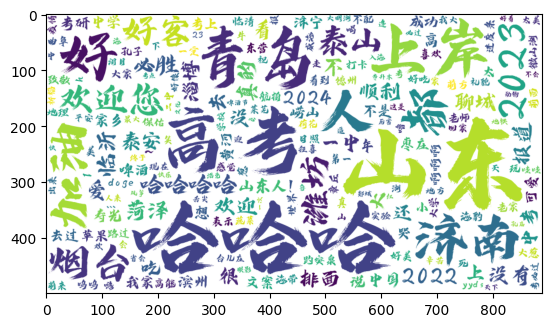

In [ ]:
pic=plt.imread('/content/drive/MyDrive/Colab Notebooks/shandong.jpeg')
wc=WordCloud(mask=pic,background_color='white',font_path='/content/drive/MyDrive/Colab Notebooks/ShangShouZhiZunShuFaTi-2.ttf')
wc.fit_words(num)

plt.imshow(wc)
plt.show()

In [ ]:
#数据读取
#分词
#加载自定义词典
#中文分词
#去除停用词
#词频统计

In [ ]:
from datetime import datetime
##datetime.fromtimestamp(data["发送时间"][0]).strftime('%Y-%m-%d %H:%M:%S')
data['发送时间']=data['发送时间'].apply(lambda x: datetime.fromtimestamp(data["发送时间"][0]).strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
data['发送时间']

0       2020-09-16 23:20:05
1       2020-09-16 23:20:05
2       2020-09-16 23:20:05
3       2020-09-16 23:20:05
4       2020-09-16 23:20:05
               ...         
7195    2020-09-16 23:20:05
7196    2020-09-16 23:20:05
7197    2020-09-16 23:20:05
7198    2020-09-16 23:20:05
7199    2020-09-16 23:20:05
Name: 发送时间, Length: 7200, dtype: object

In [ ]:
data.columns

Index(['出现时间点', '模式', '字体', '颜色', '发送时间', '弹幕池', '用户id', 'rowid', 'content'], dtype='object')

In [ ]:
data['用户id'].value_counts()

ad2b0857    65
6a9282be    47
a931f042    45
30437945    37
287fca90    35
            ..
d980fbfb     1
529d2152     1
74335bcd     1
17ae4d35     1
f24ec214     1
Name: 用户id, Length: 3331, dtype: int64

In [ ]:
data['用户id'].value_counts().value_counts()

1     2122
2      557
3      280
4      111
5       58
6       43
7       33
8       24
9       19
11      10
10      10
12       9
13       8
15       7
14       5
16       4
23       3
21       3
24       3
29       3
25       3
17       2
22       2
26       2
35       2
47       1
20       1
31       1
32       1
34       1
37       1
45       1
65       1
Name: 用户id, dtype: int64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24377 (\N{CJK UNIFIED IDEOGRAPH-5F39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

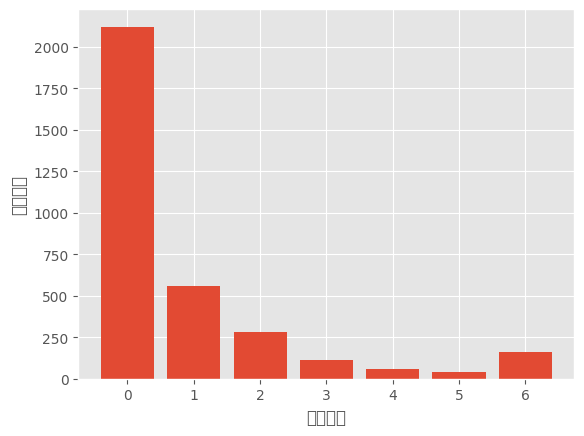

In [ ]:
num1=data['用户id'].value_counts().value_counts().sort_index()
num2=num1[:6]
num2['7 or up 7']=sum(num1[6:])
#num2
plt.style.use('ggplot')
plt.bar(range(7),num2)
plt.xlabel('弹幕数量')
plt.ylabel('用户数量')
plt.show()

In [ ]:
plt.pie(num2,autopct= '%.2f',labels=num2.index)
plt.show()